In [9]:
import sys,re
import numpy as np
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt
# Wrangle the data
import pandas as pd
# Nice figures
import seaborn as sns
# Access data
import os
# Save the results of bootstrapping
import pickle

sns.set_style("whitegrid", rc={'legend.frameon': False})
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_style("ticks", {"xtick.minor.size": 10, "ytick.minor.size": 10})
# sns.set_style({"xtick.direction": "out","ytick.direction": "out"})

sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 5, 'legend.frameon': False})

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(4)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
from matplotlib.ticker import AutoMinorLocator


%matplotlib inline
# LaTeX
mpl.rc('text', usetex=True)
# amsmath for \text{}
# helvetic to for Helvetica font
# sansmath to make math in Helvetica
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{amsmath}',
       r'\usepackage{helvet}',    
       r'\usepackage{sansmath}',  
       r'\sansmath',
       r'\renewcommand{\familydefault}{\sfdefault}',
       r'\usepackage[T1]{fontenc}',
       r'\usepackage{graphicx}'
]

In [10]:
def plot_O(OAH_experiment=None, OAH_offset=None, OAMe_experiment=None, OAMe_offset=None, offset=True):
        fig, ax = plt.subplots(1, figsize=(3.25,3), dpi=300)
        plt.subplots_adjust(bottom=0.18, left=0.22, right=0.92)
        if OAH_experiment is not None:
            ax.scatter(OAH_experiment, OAH_offset, s=80, c='#4169e1', edgecolors=None, alpha=0.6)
        if OAMe_experiment is not None:
            ax.scatter(OAMe_experiment, OAMe_offset, s=80, c='#fa8072', edgecolors=None, alpha=0.6)
        ax.set_xlabel('Experimental binding affinity (kcal/mol)', labelpad = 5)
        ax.set_ylabel('Calculated (kcal/mol)', labelpad = 5)
        ax.set_xlim([-22, 2])
        ax.set_ylim([-22, 2])
        if strings[methods.index(i)] == "SOMD-4":
            ax.set_ylim([-22, 12])
            ax.set_xlim([-22, 12])
        if strings[methods.index(i)] == "DFT-charged":
            ax.set_ylim([-22, 8])
            ax.set_xlim([-22, 8])
        if strings[methods.index(i)] == "DFT-neutral":
            ax.set_ylim([-22, 8])
            ax.set_xlim([-22, 8])
        if strings[methods.index(i)] == "CCSD(T)-neutral":
            ax.set_ylim([-22, 9])
            ax.set_xlim([-22, 9])
        if strings[methods.index(i)] == "BEDAM":
            ax.set_ylim([-22, 4])
            ax.set_xlim([-22, 4])
        ax.plot([-50,50], [-50,50], ls="-", c=".3", zorder=-1, lw='0.5')
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.set_title(strings[methods.index(i)])
        plt.tick_params(which='major', direction='inout', length=10)
        plt.tick_params(which='minor', direction='in', length=5)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        if offset:
            plt.savefig('submissions/OAH-OAMe-offset-'+strings[methods.index(i)]+'.pdf', dpi=300,  pad_inches=0.0)
        else:
            plt.savefig('submissions/OAH-OAMe-absolute-'+strings[methods.index(i)]+'.pdf', dpi=300,  pad_inches=0.0)

In [11]:
def plot_C(CBClip_experiment, CBClip_offset):
        fig, ax = plt.subplots(1, figsize=(3.25,3), dpi=300)
        plt.subplots_adjust(bottom=0.18, left=0.22, right=0.92)
        ax.scatter(CBClip_experiment, CBClip_offset, s=80, c='#00CCFF', edgecolors=None, alpha=0.6)
        ax.set_xlabel('Experimental binding affinity (kcal/mol)', labelpad = 5)
        ax.set_ylabel('Calculated (kcal/mol)', labelpad = 5)
        ax.set_xlim([-22, 2])
        ax.set_ylim([-22, 2])
        ax.plot([-50,50],[-50,50], ls="-", c=".3", zorder=-1, lw='0.5')
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.set_title(strings[methods.index(i)])
        plt.tick_params(which='major', direction='inout', length=10)
        plt.tick_params(which='minor', direction='in', length=5)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        

        if strings[methods.index(i)] != "TI/BAR":
            plt.savefig('submissions/CBClip-absolute-'+strings[methods.index(i)]+'.pdf', dpi=300, pad_inches=0.0)
        else:
            plt.savefig('submissions/CBClip-absolute-TI-BAR.pdf', dpi=300, pad_inches=0.0)


In [12]:
OAH_experiment = "-5.04 -4.25 -5.06 -9.37 -4.50 -5.33"
OAH_experiment = np.fromstring(OAH_experiment, dtype=float, sep=" ")

In [13]:
OAMe_experiment = "-5.24 -5.04 -5.94 -2.38 -3.90 -4.52"
OAMe_experiment = np.fromstring(OAMe_experiment, dtype=float, sep=" ")

In [14]:
CBClip_experiment = "-5.83 -2.51 -4.02 -7.24 -8.53 -8.64 -5.17 -6.17 -7.39 -10.35"
CBClip_experiment = np.fromstring(CBClip_experiment, dtype=float, sep=" ")

In [15]:
# Absolute
Null1 = "0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00"
Null2 = "-3.86 -7.20 -6.09 -10.54 -8.32 -8.32 -3.86 -7.20 -6.09 -10.54 -8.32 -8.32"
APR_TIP3P = "-6.50 -5.42 -6.82 -12.34 -4.77 -6.46 -7.61 -6.99 -7.34 -1.99 -5.30 -6.02"
APR_OPC = "-6.09 -5.16 -7.79 -11.35 -6.42 -6.41 -7.88 -6.97 -8.82 -0.60 -6.64 -7.04"
BEDAM = "-2.17 -6.30 -15.41 -6.29 -11.25 -7.38 -7.49 -10.60 -16.19 -2.44 -14.45 -8.87"
Metadynamics = "-3.08 -2.91 -2.26 -7.94 -1.32 -3.33 -2.56 -2.79 -0.84 -0.09 0.69 0.05"
MMPBSA_GAFF = "-2.26 0.39 -5.59 -7.37 -4.70 -2.04 -0.24 0.52 -4.42 -8.34 -2.69 -0.58"
MovTyp_1 = "-5.14 -4.85 -6.76 -10.56 -6.92 -6.26 -4.80 -5.76 -6.85 -11.41 -6.71 -7.46"
MovTyp_2 = "-3.61 -3.55 -6.44 -10.70 -6.36 -6.49 -3.49 -4.65 -6.95 -11.63 -5.88 -8.13"
PERT_bound_c = "-4.53 -2.79 -4.52 -7.85 -1.70 -4.96 -4.21 -7.17 -6.55 -9.95 -2.62 -7.05"
PERT_bound = "-7.68 -2.79 -4.85 -8.16 -1.76 -4.96 -6.15 -7.17 -6.55 -9.95 -2.62 -7.05"
PERT_hrex_c1 = "-4.29 -2.25 -3.49 -5.00 -1.70 -4.12 -4.24 -5.32 -6.55 -10.54 -2.62 -7.05"
PERT_hrex_c2 = "-4.54 -3.20 -3.49 -4.42 -1.70 -4.12 -4.29 -4.74 -6.55 -6.70 -2.62 -5.34"
PERT_hrex_c = "-4.54 -3.20 -3.49 -5.00 -1.70 -4.12 -6.42 -5.32 -6.55 -10.54 -2.92 -7.05"
PERT_hrex = "-6.42 -3.20 -3.49 -5.00 -1.76 -4.12 -6.42 -5.32 -6.55 -10.54 -2.92 -7.05"
SOMD_1 = "-8.58 -6.91 -9.05 -14.31 -8.73 -7.88 -8.38 -9.21 -9.10 -5.01 -8.41 -7.30"
SOMD_2 = "-8.60 -6.89 -8.93 -14.45 -8.73 -7.82 -8.44 -9.26 -9.09 -5.04 -8.36 -7.29"
SOMD_3 = "-6.94 -5.23 -7.28 -12.79 -7.70 -6.16 -6.78 -7.59 -7.42 -3.36 -6.69 -5.61"
SOMD_4 = "-14.19 -11.96 4.99 -21.54 6.92 -13.37 -14.02 -14.60 5.85 -12.40 8.67 -11.97"
PERT_combo = "-3.47 -2.75 -4.00 -5.59 -1.70 -4.52"
# Relative
CCSD_T_neutral = "0.00 -6.90 3.60 -20.90 -8.90 -13.10 0.00 -11.50 -10.10 5.30 -5.50 -19.80"
DFT_charged = "0.00 -1.10 -3.40 -12.60 -9.20 -17.20 0.00 -1.90 1.30 12.90 9.20 -1.80"
DFT_neutral = "0.00 -3.80 1.70 -13.90 -5.00 -10.20 0.00 -9.40 -11.20 5.50 -4.50 -15.80"
MMPBSA_OPLS = "0.00 -2.32 0.66 -6.37 -0.06 -0.35"

/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/dslochower/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

ValueError: operands could not be broadcast together with shapes (0,) (6,) 

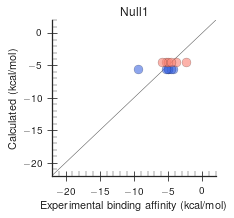

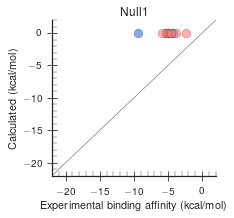

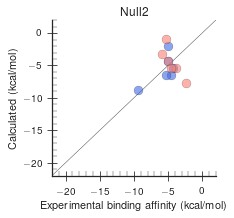

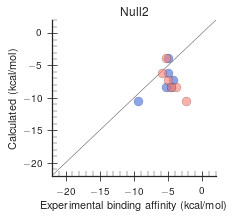

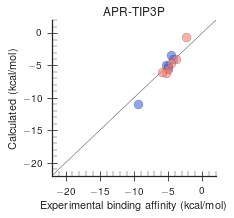

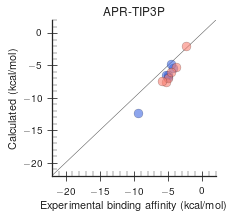

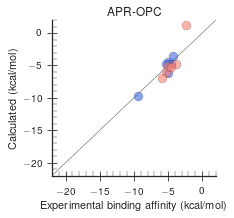

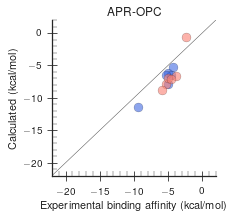

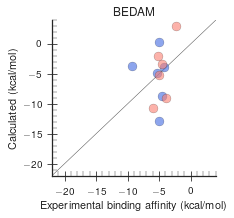

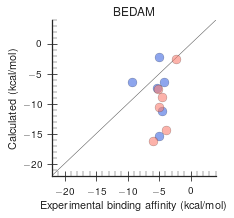

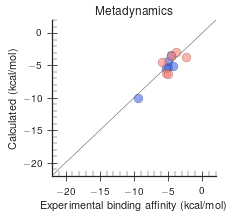

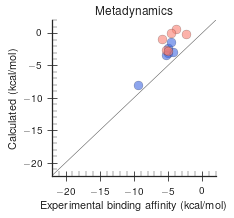

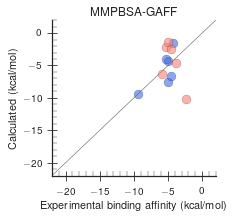

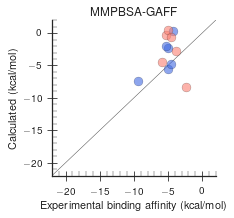

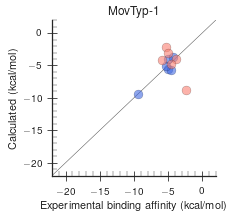

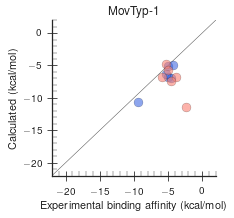

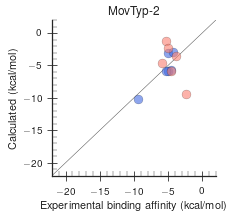

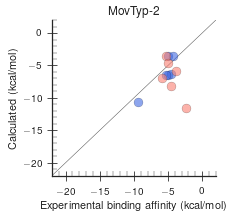

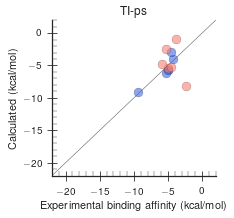

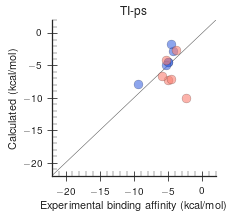

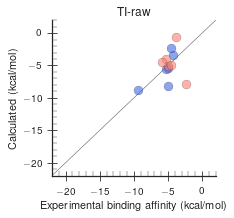

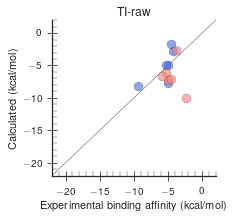

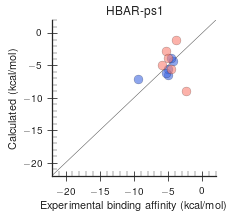

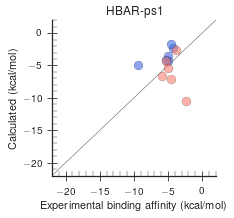

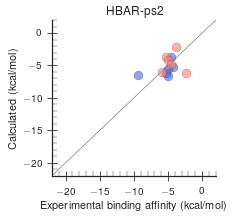

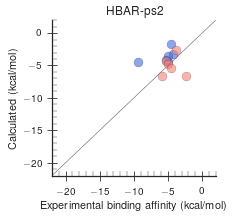

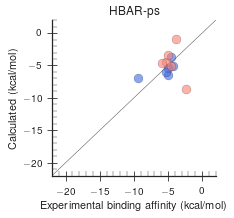

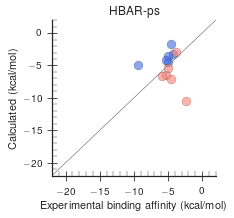

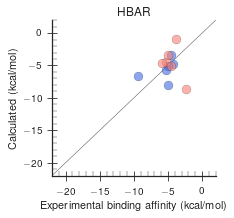

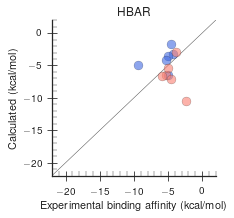

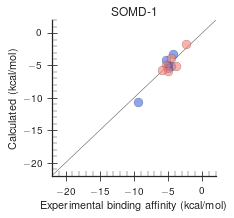

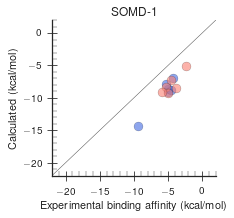

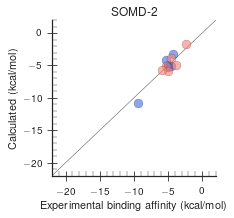

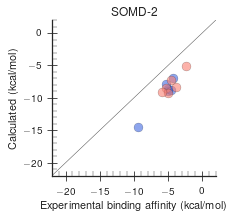

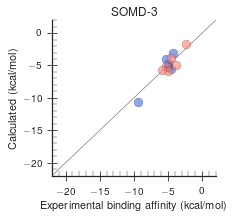

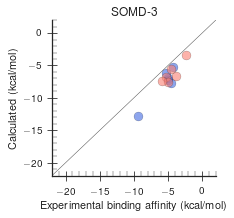

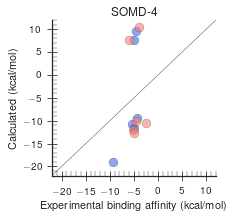

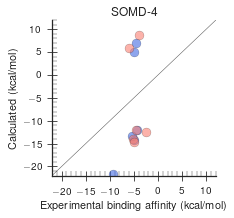

In [16]:
methods = [Null1, Null2, APR_TIP3P, APR_OPC, BEDAM, Metadynamics, MMPBSA_GAFF,
        MovTyp_1, MovTyp_2, PERT_bound_c, PERT_bound, PERT_hrex_c1, PERT_hrex_c2,
        PERT_hrex_c, PERT_hrex, SOMD_1, SOMD_2, SOMD_3, SOMD_4, PERT_combo, CCSD_T_neutral,
          DFT_charged, DFT_neutral, MMPBSA_OPLS]
strings = ["Null1", "Null2", "APR-TIP3P", "APR-OPC", "BEDAM", "Metadynamics", "MMPBSA-GAFF",
        "MovTyp-1", "MovTyp-2", "PERT-bound-c", "PERT-bound", "PERT-hrex-c1", "PERT-hrex-c2",
        "PERT-hrex-c", "PERT-hrex", "SOMD-1", "SOMD-2", "SOMD-3", "SOMD-4", "PERT-combo",
          "CCSD(T)-neutral", "DFT-charged", "DFT-neutral", "MMPBSA-OPLS"]

# Updated suggested names from reviewers...
strings=['DLPNO-CCSD(T)' if i == 'CCSD(T)-neutral' else i for i in strings]
strings=['DFT/TPSS-c' if i == 'DFT-charged' else i for i in strings]
strings=['DFT/TPSS-n' if i == 'DFT-neutral' else i for i in strings]
strings=['TI-raw' if i == 'PERT-bound' else i for i in strings]
strings=['TI-ps' if i == 'PERT-bound-c' else i for i in strings]
strings=['TI/BAR' if i == 'PERT-combo' else i for i in strings]
strings=['HBAR' if i == 'PERT-hrex' else i for i in strings]
strings=['HBAR-ps' if i == 'PERT-hrex-c' else i for i in strings]
strings=['HBAR-ps1' if i == 'PERT-hrex-c1' else i for i in strings]
strings=['HBAR-ps2' if i == 'PERT-hrex-c2' else i for i in strings]

for i in methods:
    data = np.fromstring(i, dtype=float, sep=" ")
    if strings[methods.index(i)] != "PERT-combo" and \
       strings[methods.index(i)] != "MMPBSA-OPLS":
# "Offset"
        OAH_diff = data[0:6] - OAH_experiment
        OAMe_diff = data[6:] - OAMe_experiment        
        OAH_mse = np.mean(OAH_diff)
        OAMe_mse = np.mean(OAMe_diff)
        OAH_offset = data[0:6] - OAH_mse
        OAMe_offset = data[6:] - OAMe_mse
        plot_O(OAH_experiment, OAH_offset, OAMe_experiment, OAMe_offset, offset=True)
# Absolute
        plot_O(OAH_experiment, data[0:6], OAMe_experiment, data[6:], offset=False)
    elif strings[methods.index(i)] == "PERT-combo":
        OAH_diff = data - OAH_experiment
        OAH_mse = np.mean(OAH_diff)    
        OAH_offset = data - OAH_mse
        plot_O(OAH_experiment, OAH_offset, offset=True)
        plot_O(OAH_experiment, data, offset=False)
    elif strings[methods.index(i)] == "MMPBSA-OPLS":
        OAMe_diff = data - OAMe_experiment
        OAMe_mse = np.mean(OAMe_diff)    
        OAMe_offset = data - OAMe_mse
        plot_O(OAH_experiment=None, OAH_offset=None, OAMe_experiment=OAMe_experiment, 
               OAMe_offset=OAMe_offset, offset=True)
        plot_O(OAH_experiment=None, OAH_offset=None, OAMe_experiment=OAMe_experiment, 
               OAMe_offset=data, offset=False)


In [ ]:
Null1 = "0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00"
Null2 = "-4.28 -3.29 -5.27 -5.77 -6.76 -9.23 -9.23 -8.99 -6.51 -6.76"
BAR_ab_initio = "-8.16 -6.92 -11.31 -8.45 -9.78 -8.94 -10.73 -0.63 -5.36 -6.82"
TI_ab_initio = "-7.51 -7.43 -8.97 -9.62 -10.27 -3.06 -9.77 -1.01 -5.21 -1.41"
BAR_dock = "-6.63 -4.02 -11.85 -10.22 -4.75 -5.44 -5.95 1.06 -3.40 -3.25"
TI_dock = "-7.61 -4.48 -9.78 -10.27 -2.42 -6.98 -7.00 -2.71 -7.85 6.76"
TI_BAR = "-8.16 -7.43 -11.85 -10.27 -10.27 -8.94 -10.73 -2.71 -7.85 -6.82"
BEDAM = "-5.45 -1.31 -9.22 -8.44 -5.75 -19.99 1.02 -7.16 -6.62 -15.06"
MovTyp_1 = "-4.60 -3.87 -7.47 -3.73 -4.50 -7.48 -5.29 0.00 -7.43 -3.85"
MovTyp_2 = "-3.68 -2.59 -7.97 -2.66 -3.72 -9.90 -7.37 0.00 -7.67 -2.17"
SOMD_1 = "-7.52 -0.08 0.06 -11.42 -15.41 -18.65 -13.64 -4.43 -16.28 -18.61"
SOMD_2 = "-7.37 -0.02 0.21 -11.32 -15.30 -18.46 -13.50 -4.40 -16.20 -18.56"
SOMD_3 = "-6.16 1.17 1.49 -10.11 -14.05 -17.16 -12.32 -3.07 -14.96 -17.30"
SOMD_4 = "12.13 22.18 41.39 -3.71 -9.77 -5.51 -22.39 0.53 -10.32 -16.05"

In [ ]:
methods = [Null1, Null2, BAR_ab_initio, TI_ab_initio, BAR_dock, TI_dock, TI_BAR, BEDAM, MovTyp_1,
          MovTyp_2, SOMD_1, SOMD_2, SOMD_3, SOMD_4]
strings = ["Null1", "Null2", "BAR-ab-initio", "TI-ab-initio", "BAR-dock", "TI-dock", "TI/BAR",
          "BEDAM", "MovTyp-1", "MovTyp-2", "SOMD-1", "SOMD-2", "SOMD-3", "SOMD-4"]
for i in methods:
    data = np.fromstring(i, dtype=float, sep=" ")
    plot_C(CBClip_experiment, data)